Collecting the data

In [114]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = 'AAPL'

# taking the start date as from year 2020 and end date till now
start_date = '2020-01-01'
end_date = '2024-04-26'  # Adjust the end date as needed

# Download the historical data using yahoo finance library
aapl_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Checking if data was downloaded successfully
if aapl_data.empty:
    print("No data found for the specified date range.")
else:
    # Save to CSV
    csv_filename = 'AAPL_2020_2024.csv'
    aapl_data.to_csv(csv_filename)
    print(f"Data successfully saved to {csv_filename}")

    # Optionally, display the first few rows
    print(aapl_data.head())


[*********************100%***********************]  1 of 1 completed

Data successfully saved to AAPL_2020_2024.csv
Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.796021  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088303  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662727  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.320976  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.484344  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00

In [115]:
df = aapl_data
df1 = df.reset_index()['Close']

In [116]:
df1.shape

(1086, 1)

In [117]:
df1

Ticker,AAPL
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501
...,...
1081,165.000000
1082,165.839996
1083,166.899994
1084,169.020004


Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   1086.000000  1086.000000  1086.000000  1086.000000  1086.000000   
mean     141.616644   143.612155   145.117512   141.957585   143.484540   
std       33.960440    33.648020    33.745344    33.532103    33.649941   
min       54.509754    56.092499    57.125000    53.152500    57.020000   
25%      122.990616   125.369999   126.990623   124.139997   125.602499   
50%      146.011635   148.114998   149.434998   146.389999   147.875000   
75%      169.409939   171.037506   172.599995   169.407501   170.955002   
max      197.144180   198.110001   199.619995   197.000000   198.020004   

Price         Volume  
Ticker          AAPL  
count   1.086000e+03  
mean    9.612728e+07  
std     5.354598e+07  
min     2.404830e+07  
25%     6.089400e+07  
50%     8.149215e+07  
75%     1.128487e+08  
max     4.265100e+08  
Price      Ticker
A

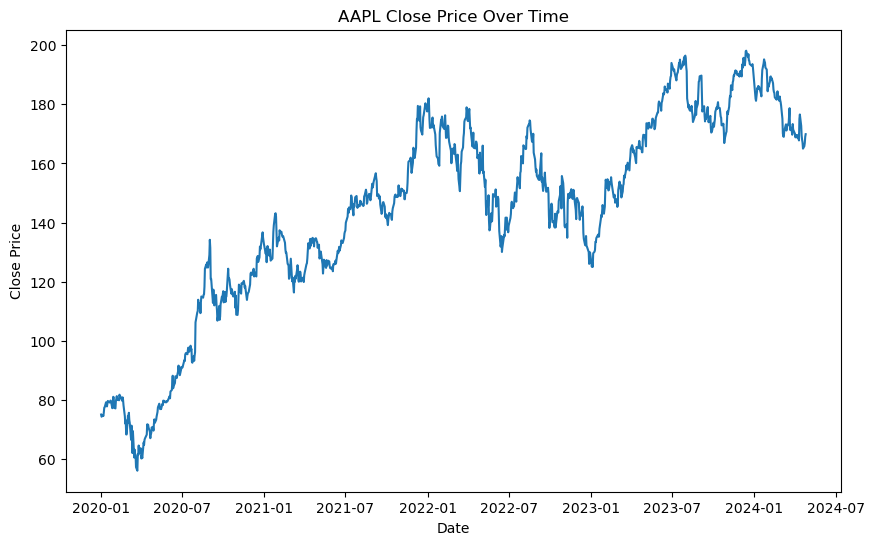

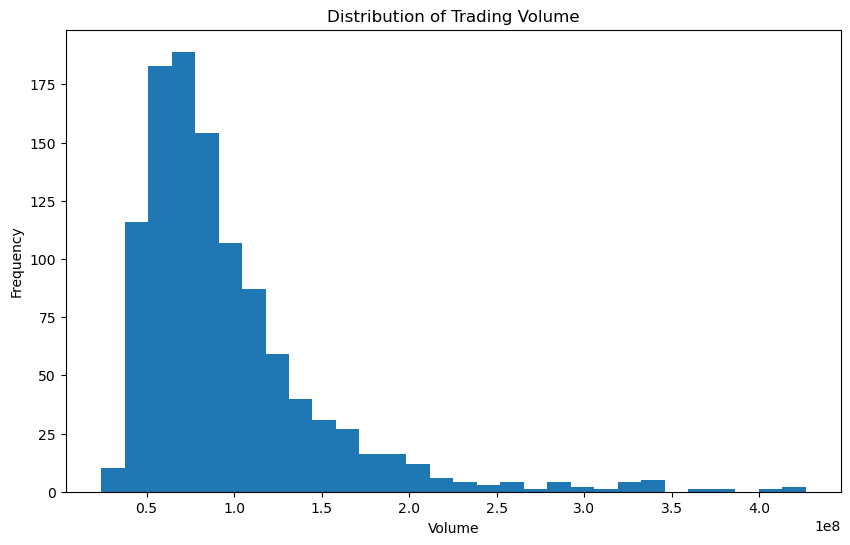

<Figure size 1000x600 with 0 Axes>

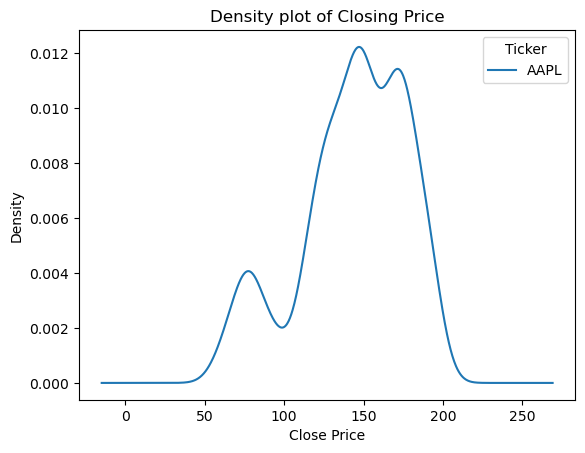

Price            Adj Close     Close      High       Low      Open    Volume
Ticker                AAPL      AAPL      AAPL      AAPL      AAPL      AAPL
Price     Ticker                                                            
Adj Close AAPL    1.000000  0.999839  0.998860  0.999020  0.997828 -0.659953
Close     AAPL    0.999839  1.000000  0.999057  0.999105  0.997973 -0.658632
High      AAPL    0.998860  0.999057  1.000000  0.998932  0.999200 -0.648216
Low       AAPL    0.999020  0.999105  0.998932  1.000000  0.999082 -0.668026
Open      AAPL    0.997828  0.997973  0.999200  0.999082  1.000000 -0.656865
Volume    AAPL   -0.659953 -0.658632 -0.648216 -0.668026 -0.656865  1.000000


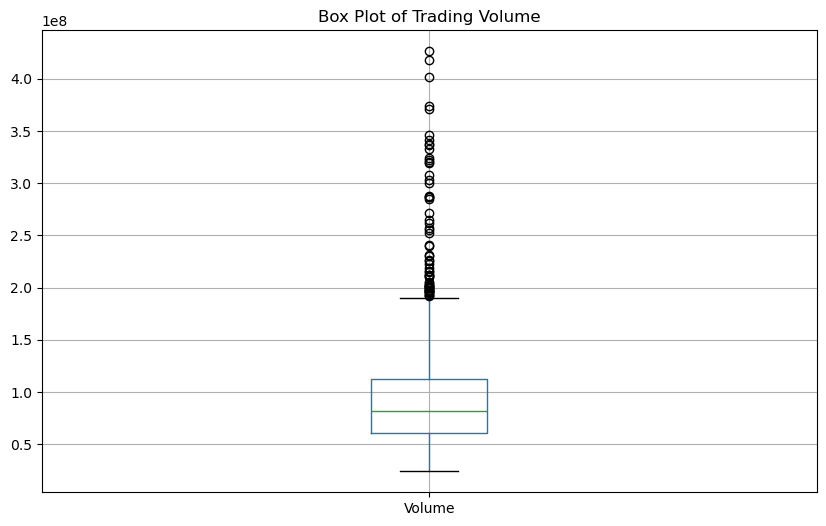

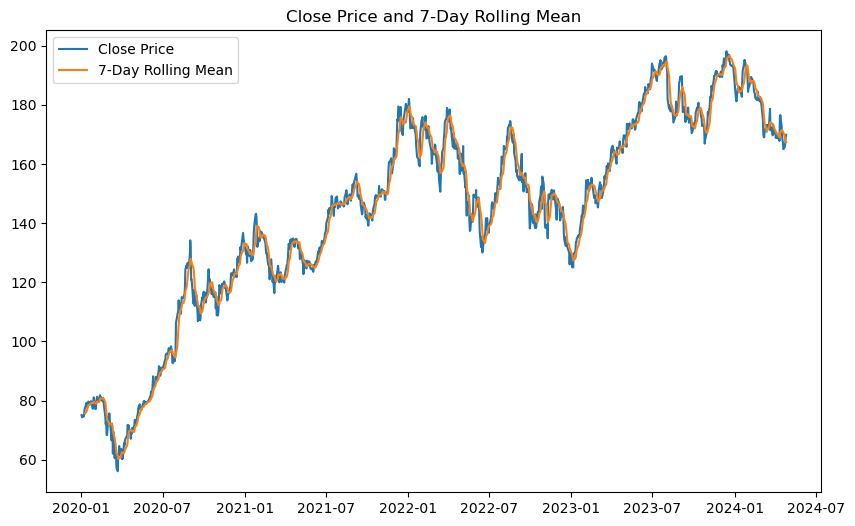

In [118]:
import matplotlib.pyplot as plt

print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data types of each column
print(df.dtypes)

# Visualizations
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=30)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
df['Close'].plot(kind='kde')
plt.title('Density plot of Closing Price')
plt.xlabel('Close Price')
plt.show()

# Correlation matrix (if you have multiple numerical columns)
print(df.corr())

# Box plot for identifying outliers (example with 'Volume')
plt.figure(figsize=(10, 6))
df.boxplot(column='Volume')
plt.title('Box Plot of Trading Volume')
plt.show()

# Rolling statistics (example with 7-day rolling mean of Close price)
df['Close_Rolling_Mean'] = df['Close'].rolling(window=7).mean()
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Close_Rolling_Mean'], label='7-Day Rolling Mean')
plt.title('Close Price and 7-Day Rolling Mean')
plt.legend()
plt.show()

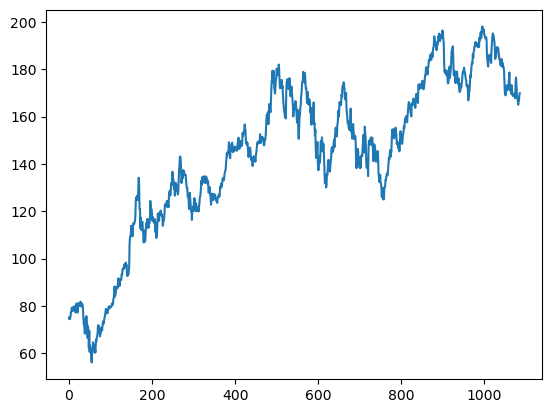

In [119]:
# plotting the close column
import matplotlib.pyplot as plt
plt.plot(df1)

In [120]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [121]:
print(df1)

[[0.13375114]
 [0.1286109 ]
 [0.13278292]
 ...
 [0.78023831]
 [0.79516612]
 [0.80129209]]


Preprocessing the data

In [137]:
#splitting the data into training and testing data set
training_set_size = int(len(df1)*0.65)
testing_set_size = len(df1) - training_set_size
training_set_size, testing_set_size

(705, 381)

In [138]:
train_data, test_data = df1[0:training_set_size,:], df1[training_set_size:len(df1),:1]
len(train_data)

705

In [139]:
#Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [140]:
#lets take time step as 100
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape), print(Y_train.shape)

(604, 100)
(604,)


(None, None)

In [141]:
print(X_test.shape), print(Y_test.shape)
#output: (no. of records, no. of timesteps)

(280, 100)
(280,)


(None, None)

In [142]:

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)

(604, 100, 1)


In [162]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU


In [163]:

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(50, return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

C:\Users\Aditya Shinde\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 50)        │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - loss: 9.3382e-04 - val_loss: 0.0012
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - loss: 8.5957e-04 - val_loss: 7.6237e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - loss: 8.8184e-04 - val_loss: 7.8659e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - loss: 8.7281e-04 - val_loss: 9.7662e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - loss: 9.1512e-04 - val_loss: 6.0303e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - loss: 7.6664e-04 - val_loss: 6.8876e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - loss: 7.4572e-04 - val_loss: 8.7063e-04
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - loss: 8.3051e-04 - val_loss: 5.1378e-04
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - loss: 7.5912e-04 - val_loss: 5.9095e-04
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - loss: 6.8629e-04 - val_loss: 5.6561e-04
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step

Predict the test data and plot the output

In [170]:
#Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [171]:
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [172]:
#Calculate Root Mean Square Error performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

141.29277868516604

In [173]:
math.sqrt(mean_squared_error(Y_test,test_predict))

179.34740615374122

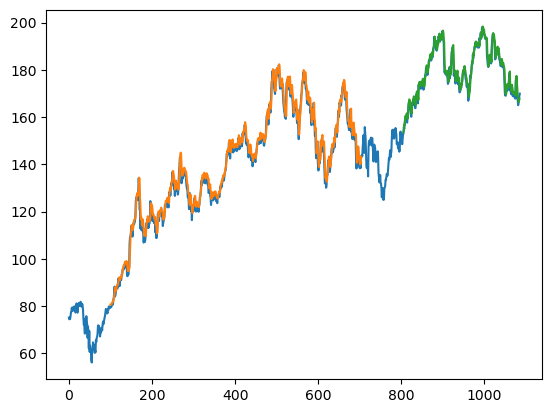

In [174]:
#Plotting 
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Predicting the future 30 days and plot the output

In [151]:
len(test_data)

381

In [152]:
#last 100 days data
x_input = test_data[281:].reshape(1,-1)
x_input.shape

(1, 100)

In [153]:
#converting it into a list
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.9516257149392747,
 0.9388807166535281,
 0.9669758840921908,
 0.9592304243386801,
 0.9729611048752377,
 0.983100717407778,
 0.9652859128557613,
 0.9760593317538494,
 0.9989438351291181,
 0.9999999999999999,
 0.9961976990218065,
 0.9843681152528364,
 0.9917615916780654,
 0.9769042636505548,
 0.9758479913366546,
 0.9682433893802677,
 0.9643706057820031,
 0.9650746798815849,
 0.9681025315831439,
 0.9607090551579148,
 0.9121939123000661,
 0.9024063905388257,
 0.8859295738949565,
 0.8807892850086153,
 0.9116305885545896,
 0.9086732194731016,
 0.9160666958983305,
 0.9118418215287659,
 0.9141654916877245,
 0.8980407658151556,
 0.8913513634895086,
 0.9332476940847999,
 0.9538789024781625,
 0.9702853439449789,
 0.979368684163619,
 0.9745805934915962,
 0.9722569233326374,
 0.959934498438262,
 0.9550759251461681,
 0.9290931948922879,
 0.9034625554097077,
 0.9207844113933007,
 0.913672650562319,
 0.9265582917591527,
 0.9379654095797699,
 0.9387399662994228,
 0.9310648817229649,
 0.93479680752410

In [154]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day out {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.7569595]
101
1 day input [0.93888072 0.96697588 0.95923042 0.9729611  0.98310072 0.96528591
 0.97605933 0.99894384 1.         0.9961977  0.98436812 0.99176159
 0.97690426 0.97584799 0.96824339 0.96437061 0.96507468 0.96810253
 0.96070906 0.91219391 0.90240639 0.88592957 0.88078929 0.91163059
 0.90867322 0.9160667  0.91184182 0.91416549 0.89804077 0.89135136
 0.93324769 0.9538789  0.97028534 0.97936868 0.97458059 0.97225692
 0.9599345  0.95507593 0.92909319 0.90346256 0.92078441 0.91367265
 0.92655829 0.93796541 0.93873997 0.93106488 0.93479681 0.92282637
 0.90796904 0.90170221 0.89966025 0.88874609 0.88346505 0.88881657
 0.90325132 0.89022482 0.88064853 0.89099938 0.88247926 0.87776154
 0.87008646 0.83797775 0.80291158 0.79587019 0.79502526 0.80720683
 0.82143046 0.82481029 0.81002345 0.8231908  0.82051504 0.82826061
 0.84487828 0.86311545 0.81171331 0.818121   0.80805187 0.80002469
 0.82537361 0.81248787 0.80227788 0.79389861 0.79960212 0.79375786
 0.79910928 0.79115248 0.79974297 

In [155]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [156]:
import matplotlib.pyplot as plt

In [157]:
len(df1)

1086

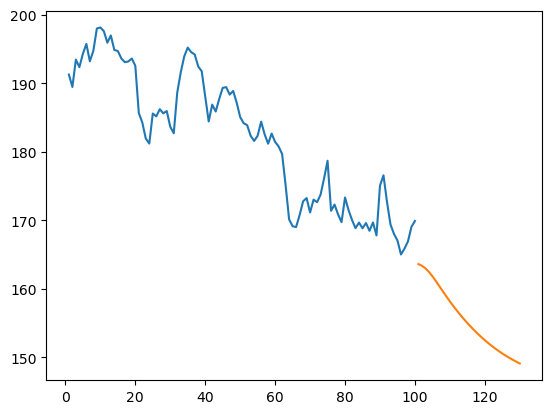

In [158]:
plt.plot(day_new, scaler.inverse_transform(df1[986:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

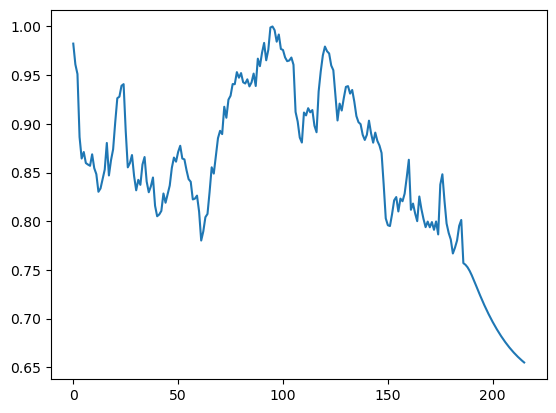

In [159]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [160]:
from tensorflow.keras import backend as K
lr = K.eval(model.optimizer.learning_rate)
print(f"Learning rate: {lr}")

Learning rate: 0.0010000000474974513
